# EDA of Historical Buoy Data stn. 40206

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('laperouse_stn46206_clean.csv')

In [26]:
df['DATE'].head(100)

0    1988-11-22 22:34:00
1    1988-11-23 00:33:00
2    1988-11-23 01:34:00
3    1988-11-23 02:34:00
4    1988-11-23 04:34:00
             ...        
95   1988-11-27 05:34:00
96   1988-11-27 06:34:00
97   1988-11-27 07:34:00
98   1988-11-27 08:33:00
99   1988-11-27 09:34:00
Name: DATE, Length: 100, dtype: datetime64[ns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237882 entries, 0 to 237881
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STN_ID     237882 non-null  object 
 1   DATE       237882 non-null  object 
 2   Q_FLAG     237882 non-null  int64  
 3   LATITUDE   237882 non-null  float64
 4   LONGITUDE  237882 non-null  float64
 5   DEPTH      237882 non-null  float64
 6   VWH$       237882 non-null  float64
 7   VCMX       237882 non-null  float64
 8   VTP$       237882 non-null  float64
 9   WDIR       237882 non-null  float64
 10  WSPD       237882 non-null  float64
 11  GSPD       237882 non-null  float64
 12  WDIR.1     237882 non-null  float64
 13  WSPD.1     237882 non-null  float64
 14  GSPD.1     237882 non-null  float64
 15  ATMS       237882 non-null  float64
 16  DRYT       237882 non-null  float64
 17  SSTP       237882 non-null  float64
 18  YEAR       237882 non-null  int64  
dtypes: float64(15), int64(2

In [5]:
df['DATE']=pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237882 entries, 0 to 237881
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   STN_ID     237882 non-null  object        
 1   DATE       237882 non-null  datetime64[ns]
 2   Q_FLAG     237882 non-null  int64         
 3   LATITUDE   237882 non-null  float64       
 4   LONGITUDE  237882 non-null  float64       
 5   DEPTH      237882 non-null  float64       
 6   VWH$       237882 non-null  float64       
 7   VCMX       237882 non-null  float64       
 8   VTP$       237882 non-null  float64       
 9   WDIR       237882 non-null  float64       
 10  WSPD       237882 non-null  float64       
 11  GSPD       237882 non-null  float64       
 12  WDIR.1     237882 non-null  float64       
 13  WSPD.1     237882 non-null  float64       
 14  GSPD.1     237882 non-null  float64       
 15  ATMS       237882 non-null  float64       
 16  DRYT       237882 no

## Data Dictionary

- DEPTH: Depth in meters.
- DATE : Date time
- VWH\$: Characteristic significant wave height (reported by the buoy) (m)
- VCMX: Maximum zero crossing wave height (reported by the buoy) (m)
- VTP\$: Wave spectrum peak period (reported by the buoy) (s)
- WDIR: Direction from which the wind is blowing (° True)
- WSPD: Horizontal wind speed (m/s)
- WSS\$:Horizontal scalar wind speed (m/s)
- GSPD: Gust wind speed (m/s)
- ATMS: Atmospheric pressure at sea level (mbar)
- DRYT: Dry bulb temperature (air temperature) (°C)
- SSTP: Sea surface temperature (°C)
- Q_FLAG: 0
    - Blank - No quality control (QC) has been performed
    - 1- Good - QC has been performed: record appears correct
    - 3-Doubtful - QC has been performed: record appears doubtful
    - 4-Erroneous - QC has been performed: record appears erroneous
    - 5-Changes - The record has been changed as a result of QC
    - 6-Acceptable - QC has been performed: record seems inconsistent with other records
    - 7-Off Position - There is a problem with the buoy position or mooring. Data may still be useful.
    - 8-Reserved
    - 9-Reserved - indicates missing elements



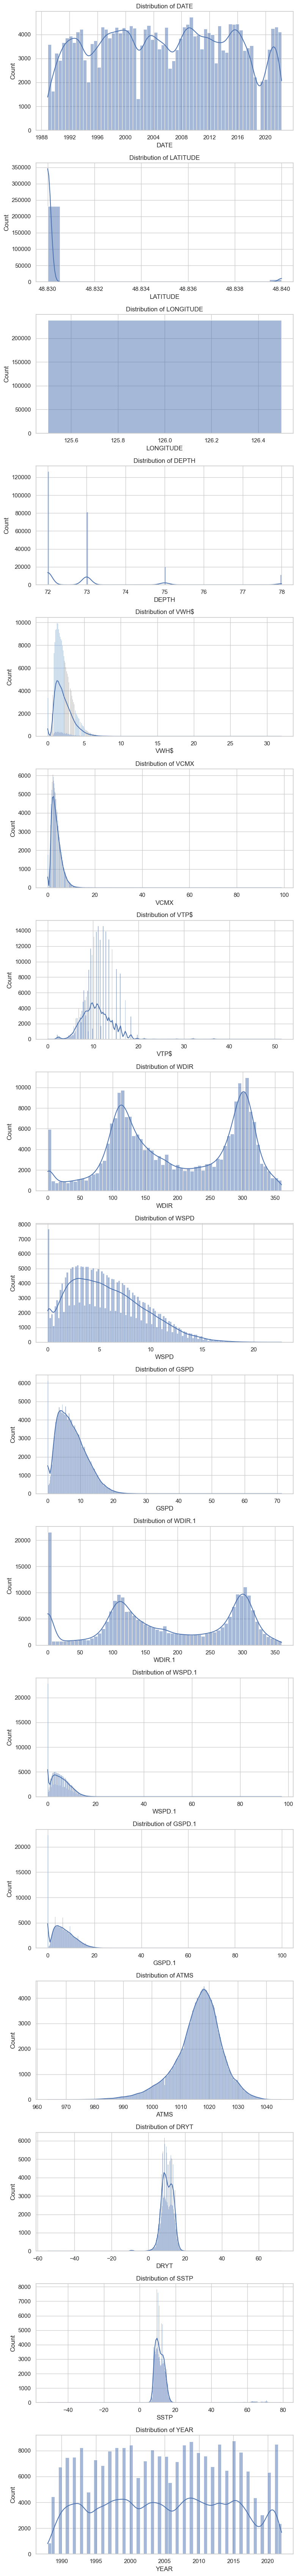

In [18]:
# look at distribution of values in columns (exclude Q flag)

columns_to_exclude = ['Q_FLAG', 'STN_ID']
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Create a DataFrame with only the selected columns
subset_df = df[columns_to_include]

# Plot the distribution using Seaborn
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(columns_to_include),ncols=1, figsize=(8, 4 * len(columns_to_include)))


for i, col in enumerate(columns_to_include):
    sns.histplot(subset_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


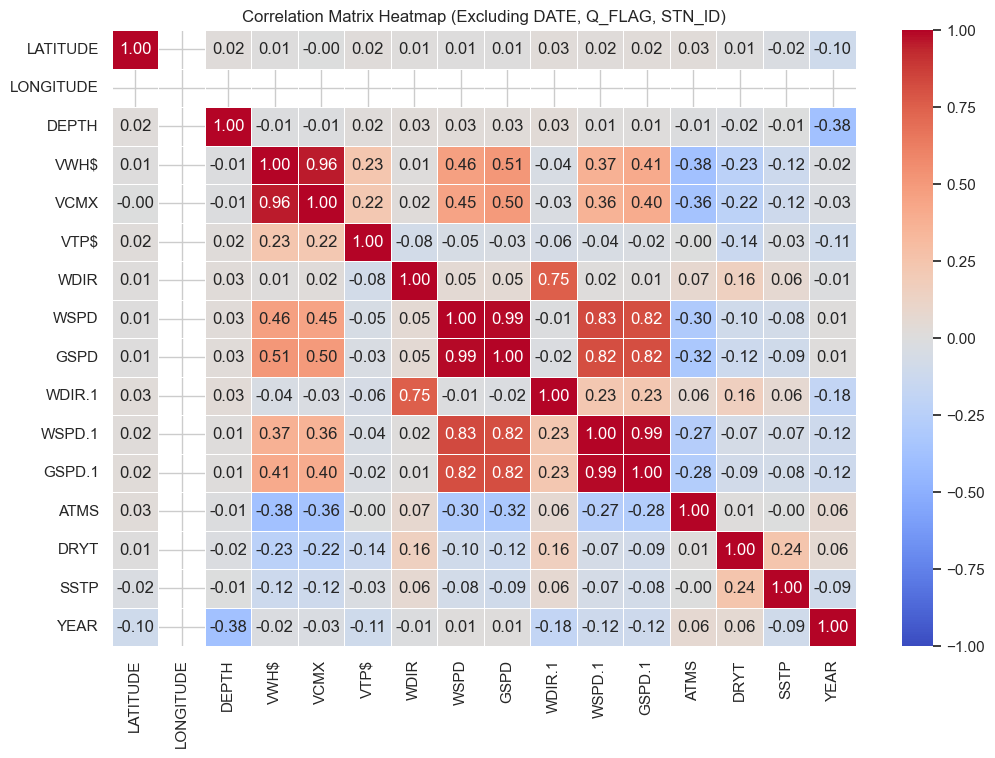

In [20]:


# Exclude columns 'DATE', 'Q_FLAG', 'STN_ID'
columns_to_exclude = ['DATE', 'Q_FLAG', 'STN_ID']
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Create a DataFrame with only the selected columns
subset_df = df[columns_to_include]

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin= -1, vmax =1)
plt.title('Correlation Matrix Heatmap (Excluding DATE, Q_FLAG, STN_ID)')
plt.show()


In [22]:
df[['LATITUDE','LONGITUDE']].describe()

,LATITUDE,LONGITUDE
count,237882.000000,237882.0
mean,48.830287,126.0
std,0.001669,0.0
min,48.830000,126.0
25%,48.830000,126.0
50%,48.830000,126.0
75%,48.830000,126.0
max,48.840000,126.0


In [ ]:
#look at correlation with target variable(s): VWH$ and VTP$